## 4.9 Data Visualization

### This script contains the following points:

#### 1. Import Data
#### 2. Bar Chart
#### 3. Exporting Charts
#### 4. Creating Histograms and Scatterplots
#### 5. Creating Line Charts
#### 6. 

#### 8. Export new dataframe as pickle file

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 1. Import Data

In [4]:
#Import Data
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

# Importing products df
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregated.pkl'))

#### 2. Bar Chart

<Axes: xlabel='order_day_of_week'>

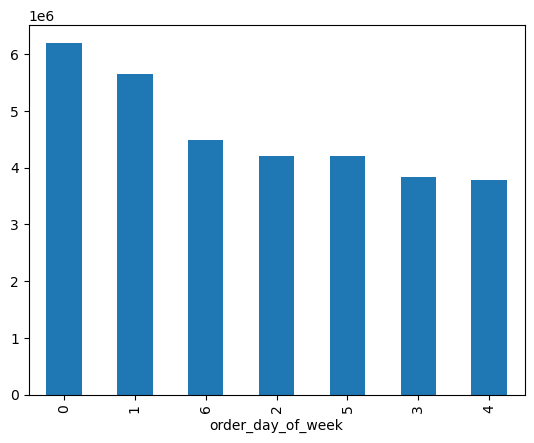

In [6]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

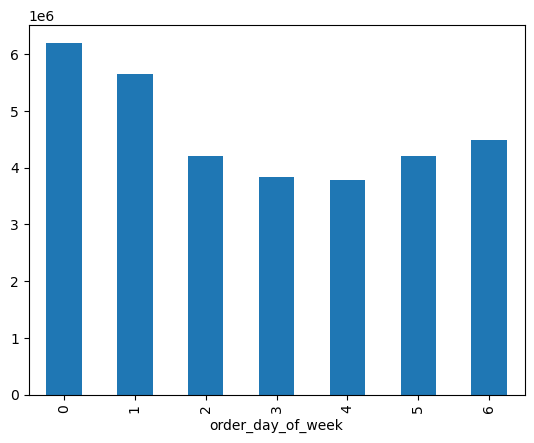

In [7]:
# order by day of week
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

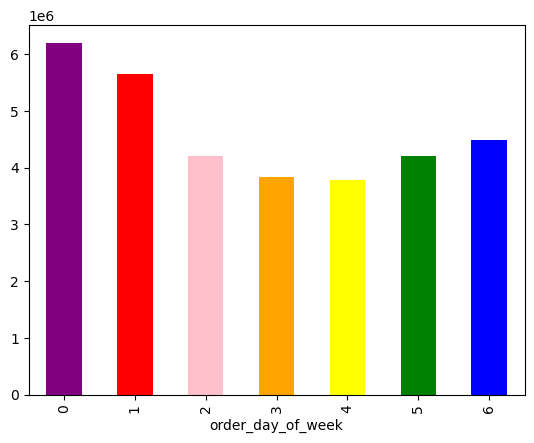

In [8]:
# change color of bars
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### 3. Exporting Charts

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 4. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

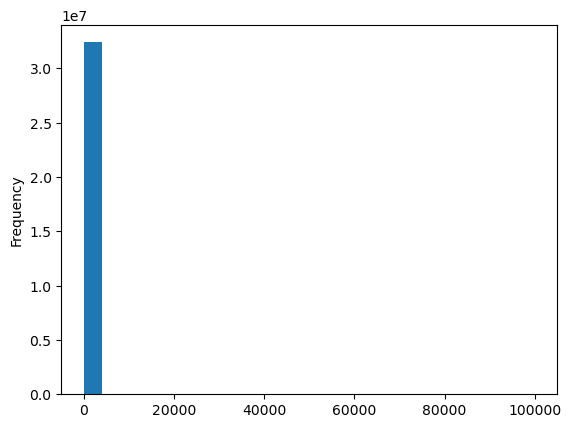

In [10]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [ ]:
# --> this does not look right, we should have gotten 25. Let's analyze the data

In [11]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

In [ ]:
# --> the max is so high we can deduce there is some data corruption

<Axes: xlabel='prices', ylabel='prices'>

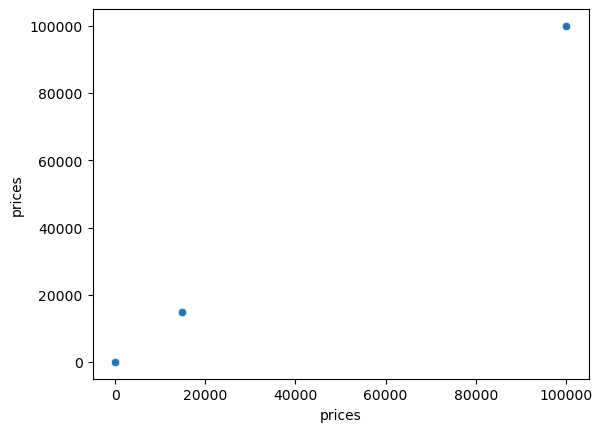

In [15]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [17]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regular Days,Most orders,40,Regular customer,High spender,108.648299,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regular Days,Average orders,40,Regular customer,High spender,108.648299,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regular Days,Average orders,4,New customer,High spender,1154.792308,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest Days,Average orders,4,New customer,High spender,1154.792308,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest Days,Average orders,16,Regular customer,High spender,114.426619,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest Days,Average orders,39,Regular customer,High spender,1106.743956,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest Days,Average orders,39,Regular customer,High spender,1106.743956,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest Days,Most orders,15,Regular customer,High spender,451.153540,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest Days,Average orders,12,Regular customer,High spender,1178.381871,12.0,Regular customer


In [19]:
# --> There are 5127 outliers skewing the data

# remove value of these outliers 
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

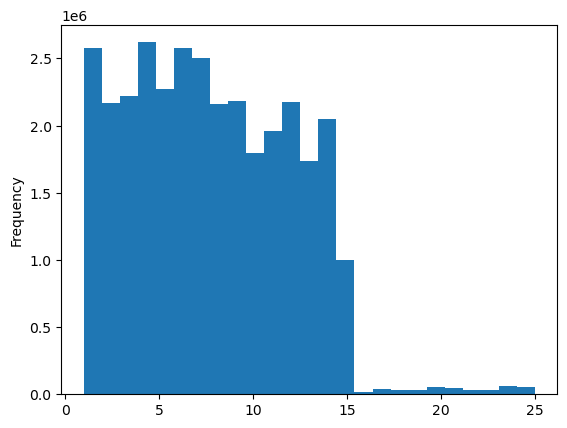

In [20]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

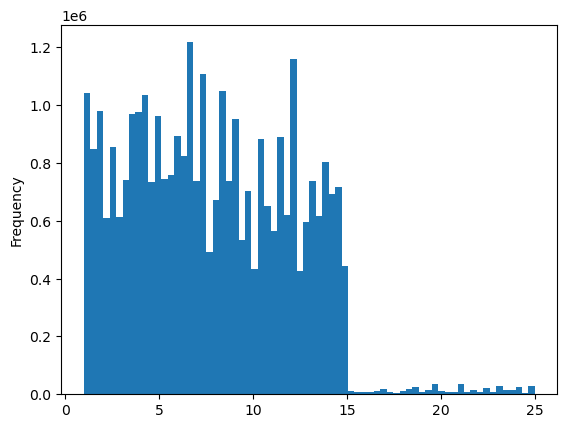

In [21]:
ords_prods_merge['prices'].plot.hist(bins = 70)

#### 5. Creating Line Charts after sampling

In [23]:
df = ords_prods_merge[:2000000]

In [24]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [26]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [28]:
len(ords_prods_merge)

32404859

In [27]:
len(big) + len(small)

32404859

In [30]:
df_2 = small[['order_day_of_week','prices']]

In [31]:
df_2.head()

,order_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


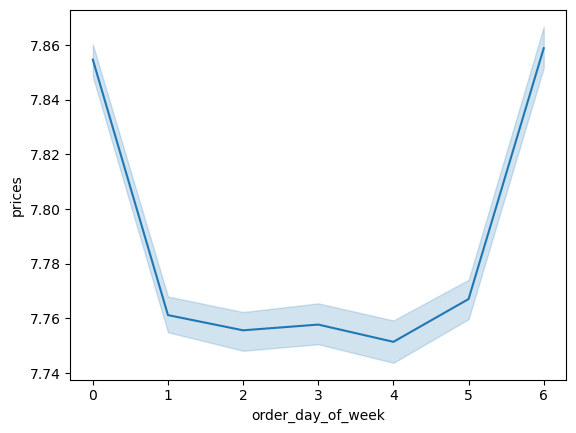

In [33]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [34]:
line

<Axes: xlabel='order_day_of_week', ylabel='prices'>

#### 8. Export new dataframe as pickle file

In [24]:
# Export data to pkl
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', '.pkl'))